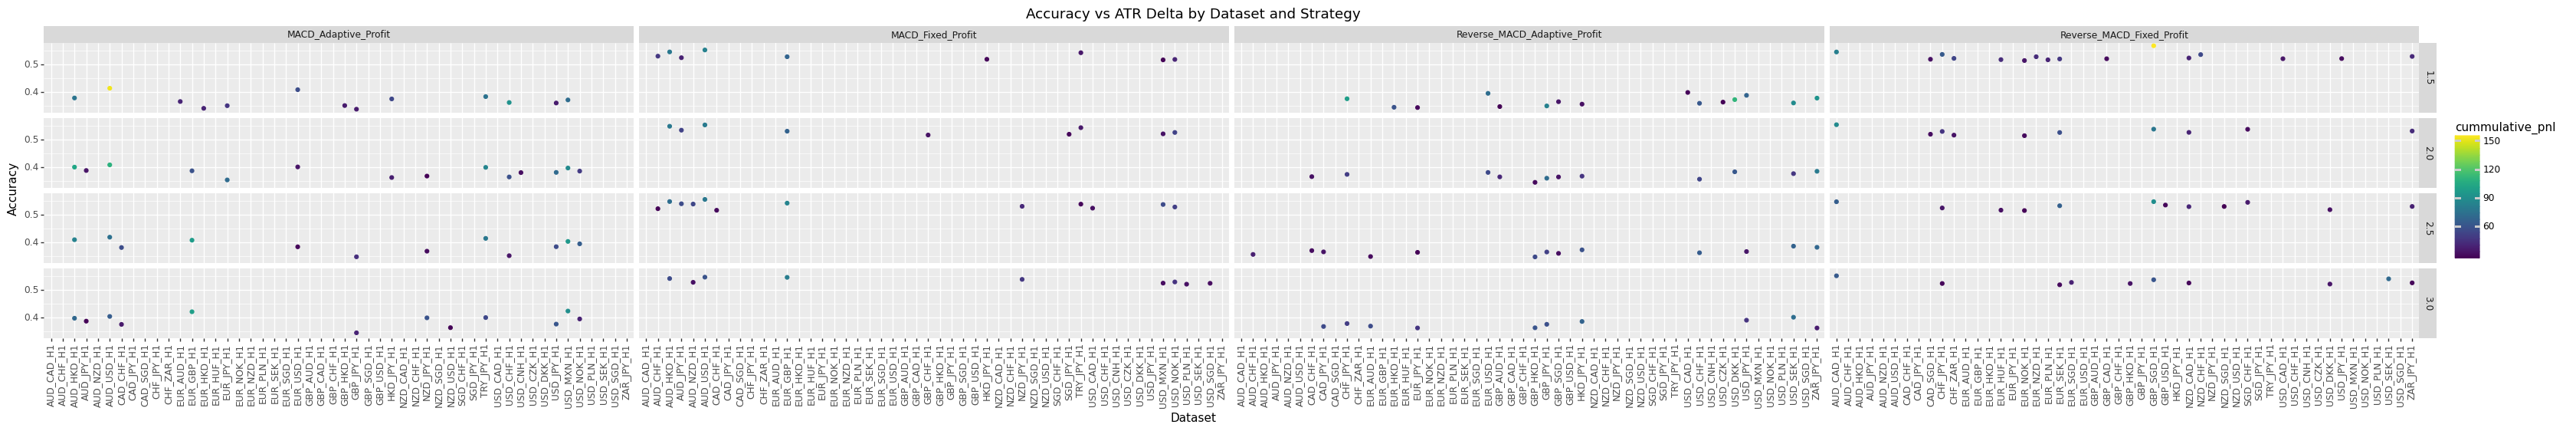

In [2]:
from plotnine import *
import pandas as pd
date_time = "2024-01-25_20:09"

df = pd.read_csv(
    f"/projects/genomic-ml/da2343/ml_project_2/cnn/results/{date_time}_results.csv"
)
df = df[(df["cummulative_pnl"] > 30) & (df["atr_delta"] >= 1.5)]
# df = df[
#     ((df["strategy"] == "MACD_Adaptive_Profit") & (df["accuracy"] >= 0.35))
#     | ((df["strategy"] == "Reverse_MACD_Adaptive_Profit") & (df["accuracy"] >= 0.35))
#     | ((df["strategy"] == "MACD_Fixed_Profit") & (df["accuracy"] >= 0.53))
#     | ((df["strategy"] == "Reverse_MACD_Fixed_Profit") & (df["accuracy"] >= 0.53))
# ]

# take first 10 rows
# df = df.head(10)

p = ggplot(df)
p = p + geom_point(aes(x="dataset_name", y="accuracy", color="cummulative_pnl"))
p = p + facet_grid("atr_delta~strategy")
p = p + labs(
    x="Dataset", y="Accuracy", title="Accuracy vs ATR Delta by Dataset and Strategy"
)
p = p + theme(axis_text_x=element_text(angle=90))
p = p + theme(figure_size=(40, 5))
print(p)

In [3]:
df

,dataset_name,strategy,atr_delta,accuracy,cummulative_pnl,num_trades
13,EUR_NOK_H1,Reverse_MACD_Fixed_Profit,2.5,0.514599,31.000000,1096
21,EUR_JPY_H1,Reverse_MACD_Adaptive_Profit,1.5,0.343675,32.756083,838
22,EUR_USD_H1,MACD_Adaptive_Profit,2.0,0.400685,36.646460,584
24,EUR_GBP_H1,MACD_Fixed_Profit,3.0,0.544751,81.000000,905
32,ZAR_JPY_H1,Reverse_MACD_Adaptive_Profit,1.5,0.377807,93.126115,757
...,...,...,...,...,...,...
918,EUR_GBP_H1,MACD_Fixed_Profit,1.5,0.527230,69.000000,1267
924,HKD_JPY_H1,MACD_Adaptive_Profit,2.0,0.362440,40.179585,836
930,USD_SEK_H1,Reverse_MACD_Adaptive_Profit,2.0,0.376426,49.527363,1052
949,AUD_HKD_H1,MACD_Adaptive_Profit,3.0,0.397101,70.671749,690


In [ ]:
p.save(filename = "plot.png", dpi=3000)
